In [16]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [17]:
def extract_dataset(zip_path, extract_path):
    if not os.path.exists(extract_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Extracted dataset to: {extract_path}")
    else:
        print(f"Dataset already extracted at: {extract_path}")

In [ ]:
def prepare_data(data_dir, img_size=(150, 150), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2  
    )
    
    train_data = train_datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )
    
    val_data = train_datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )
    
    return train_data, val_data

In [19]:
def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  
    ])
    return model

In [ ]:
def train_and_evaluate(data_dir, img_size=(150, 150), batch_size=32, epochs=10):
    train_data, val_data = prepare_data(data_dir, img_size, batch_size)
    
    print(f"Training samples: {train_data.samples}")
    print(f"Validation samples: {val_data.samples}")
    
    if train_data.samples == 0 or val_data.samples == 0:
        raise ValueError("No data found in the specified directories. Check directory structure.")
    
    model = create_model((img_size[0], img_size[1], 3))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        train_data,
        epochs=epochs,
        validation_data=val_data
    )
    
    return model, history


In [ ]:
#To Organize the file
import os
import shutil

train_dir = 'train'
cats_dir = os.path.join(train_dir, 'cats')
dogs_dir = os.path.join(train_dir, 'dogs')

os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

for file_name in os.listdir(train_dir):
    file_path = os.path.join(train_dir, file_name)
    if os.path.isfile(file_path):
        if file_name.startswith('cat'):
            shutil.move(file_path, os.path.join(cats_dir, file_name))
        elif file_name.startswith('dog'):
            shutil.move(file_path, os.path.join(dogs_dir, file_name))

print("Files organized successfully!")


Files organized successfully!


In [ ]:
ZIP_PATH = 'dogs-vs-cats.zip'  
EXTRACT_PATH = 'dogs-vs-cats'  
DATA_DIR = 'train'  

extract_dataset(ZIP_PATH, EXTRACT_PATH)

try:
    model, history = train_and_evaluate(DATA_DIR)
    model.save('dogs_vs_cats_cnn_model.h5') 
    print("Model training complete and saved as 'dogs_vs_cats_cnn_model.h5'")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset already extracted at: dogs-vs-cats
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Training samples: 20000
Validation samples: 5000


c:\Users\ADMIN\anaconda3\envs\DeepLearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ADMIN\anaconda3\envs\DeepLearning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.5352 - loss: 0.7002

c:\Users\ADMIN\anaconda3\envs\DeepLearning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 393s 625ms/step - accuracy: 0.5352 - loss: 0.7002 - val_accuracy: 0.5922 - val_loss: 0.6660
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 207s 331ms/step - accuracy: 0.6183 - loss: 0.6551 - val_accuracy: 0.6638 - val_loss: 0.6233
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 326ms/step - accuracy: 0.6712 - loss: 0.6134 - val_accuracy: 0.7316 - val_loss: 0.5319
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 326ms/step - accuracy: 0.7104 - loss: 0.5637 - val_accuracy: 0.7338 - val_loss: 0.5386
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 326ms/step - accuracy: 0.7340 - loss: 0.5312 - val_accuracy: 0.7708 - val_loss: 0.4936
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 206s 329ms/step - accuracy: 0.7517 - loss: 0.5136 - val_accuracy: 0.7640 - val_loss: 0.4832
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 326ms/step - accuracy: 0.7614 - loss: 0.4931 - val_accuracy: 0.7476 - val_loss: 0.5168
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 328ms/step - accuracy: 0.7744 - loss: 0.47

Model training complete and saved as 'dogs_vs_cats_cnn_model.h5'


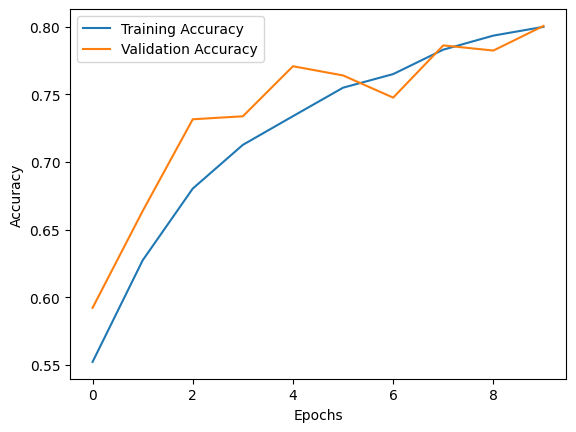

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
